## <span style="font-family: Algerian; font-weight:bold;font-size:1.5em;color:Red; center">      Project on Recommendation Systems:

## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.5em;color:violet;">Contents:

[Data Description](#Ds)

[Attribute Information](#AI)

[Objective](#O)

[Steps, Tasks and Solution](#sts)



<a id='the_destination'></a>

## <span style="font-family: Copperplate Gothic Bold; font-weight:bold;font-size:1em;color:Orange;"> Data Description
<a id='Ds'></a>
    <font color=darkblue>
        

- Domain - E-commerce
        
- Context - Everyday a million products are being recommended to users based on
popularity and other metrics on e-commerce websites. The most popular e-commerce
website boosts average order value by 50%, increases revenues by 300%, and
improves conversion. In addition to being a powerful tool for increasing revenues,
product recommendations are so essential that customers now expect to see similar
features on all other eCommerce sites.
        

        
 </font>

## <span style="font-family: Copperplate Gothic Bold; font-weight:bold;font-size:1 em;color:Orange;">Attribute Information
<a id='AI'></a>
    <font color=darkblue> 
                       
* First three columns are userId, productId, and ratings respectively and the fourth column is timestamp.
        
</font>

## <span style="font-family: Copperplate Gothic Bold; font-weight:bold;font-size:1 em;color:Orange;"> Objective
<a id='O'></a>
    <font color=darkblue>  The aim of the dataset is to make a recommendation system that recommends at least five(5)
new products based on the user's habits.
        
</font>

## <span style="font-family: Copperplate Gothic Bold; font-weight:bold;font-size:1 em;color:Orange;"> Steps, Tasks and Solutions
<a id='sts'></a>
    <font color=red>
        
1. [Import the necessary libraries](#I)
        
2. [Read Explore the dataset](#R)
        
3. [Perform basic EDA](#EDA)
        
    * a. [Renaming of columns](#3a)
        
    * b. [Description of the dataset (general operations and statistical description)](#3b) 
        
    * c. [Histogram](#3c) 
        
    * d. [Observations](#3d)
              
        
4. [Making dataset less sparse/denser & Spliting data into Test and Train Set](#STT)
   
    
5. [Operation -1: Popularity Recommender Model](#O1)
              
           
6. [Operation -2: Collaborative Filtering Model and it's evaluation](#O2)
        
    * a. [Singular Value Decomposition (SVD)](#O2a) 
        
    * b. [Item-Item Collaborative Model](#O2b) 
        
    * c. [User-User Collaborative model](#O2c) 
        
        
7. [Operation -3: Collaborative Filtering Model using Surprise Library and it's evaluation](#O3)
        
    * a. [Singular Value Decomposition (SVD)](#O3a) 
        
    * b. [Item-Item Collaborative Model](#O3b) 
        
    * c. [User-User Collaborative model](#O3c) 
   
        
8. [Get top - K ( K = 5) recommendations to the user](#8K)
                  
        
9. [Summary](#C)
        
        
10. [Optional](#Op)
        
        
</font>
    <a id='the_destination'></a>

## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 1. Import the necessary libraries
<a id='I'></a>

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import required libraries
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import recmetrics
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

C:\Users\VAIO\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 2. Read Explore the dataset
<a id='R'></a>

In [3]:
df = pd.read_csv("ratings_Electronics.csv")

In [4]:
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 3. Perform basic EDA
<a id='EDA'></a>

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   3.a. Renaming of columns
<a id='3a'></a>

In [5]:
df.columns = ['userId', 'productId', 'ratings', 'timestamp']

In [6]:
df.head()

,userId,productId,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   3.b. Description of the dataset (general operations and statistical description)
<a id='3b'></a>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
def indetailtable(df):
    print(f'Dataset Shape: {df.shape}')
    print('Total Number of rows in dataset= {}'.format(df.shape[0]))
    print('Total Number of columns in dataset= {}'.format(df.shape[1]))
    print('Various datatypes present in the dataset are: {}\n'.format(df.dtypes.value_counts()))
    
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary['Name'] = summary[['Name', 'dtypes']]
    summary['Misssing_values'] = df.isnull().sum().values
    summary['Unique_values'] = df.nunique().values
    summary['Duplicate_values'] = df.duplicated().sum()
    summary['1st value'] = df.loc[0].values
    summary['2nd Value'] = df.loc[1].values
    summary['7824479th Value'] = df.loc[7824479].values
    summary['7824480th Value'] = df.loc[7824480].values
    
    return summary

In [9]:
brief = indetailtable(df)
brief

Dataset Shape: (7824481, 4)
Total Number of rows in dataset= 7824481
Total Number of columns in dataset= 4
Various datatypes present in the dataset are: object     2
float64    1
int64      1
dtype: int64



,index,dtypes,Name,Misssing_values,Unique_values,Duplicate_values,1st value,2nd Value,7824479th Value,7824480th Value
0,userId,object,userId,0,4201696,0,A2CX7LUOHB2NDG,A2NWSAGRHCP8N5,A10M2KEFPEQDHN,A2G81TMIOIDEQQ
1,productId,object,productId,0,476001,0,0321732944,0439886341,BT008UKTMW,BT008V9J9U
2,ratings,float64,ratings,0,5,0,5,1,4,5
3,timestamp,int64,timestamp,0,5489,0,1341100800,1367193600,1297555200,1312675200


### *Comments:*


<font color = blue>

- There are total 78,24,481 number of records with 4 number of columns.
- Out of 4 number of columns, 1st column indicates the userId , 2nd indicates productId, third indicates the ratings provided users for each products and the fourth one indicates the timespan.
- Both userId and productId are object type of datatype and ratings is float64 and timestamp is int64 kind of datatype.
- Out of all the 4 number of columns, timestamp has no use in recommendation engine, so it can be deleted while building the engine.
- Ratings column has total five number of unique values starting from 1 to 5.
- Where 1 indicates the lowest rating and 5 indicates highest rating.
- In this dataset, neither we have any missing values nor do we have duplicate values.
- However, many number of unique values can be observed except ratings column.
- Further we will check for null values and '?' in the dataset.

In [10]:
df.isnull().values.any()

False

In [11]:
for value in ['userId', 'productId', 'ratings', 'timestamp']:
    print(value,':', sum(df[value] == '?'))

userId : 0
productId : 0
ratings : 0
timestamp : 0


#### *Comments:*


<font color = blue>

- We don't have any null values in the dataset
- We don't have any symbols like '?' in the dataset.
- The dataset seems to be legit for further EDA and building recommendation engine.

In [12]:
# Summary statistics of 'rating' variable
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,7824481.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824481.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


### *Comments:*


<font color = blue>

- Same the minimum value of rating is 1 and maximum value is 5.
- timestamp column is of no use here, so we can drop the column.

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   3.c. Histogram
<a id='3c'></a>

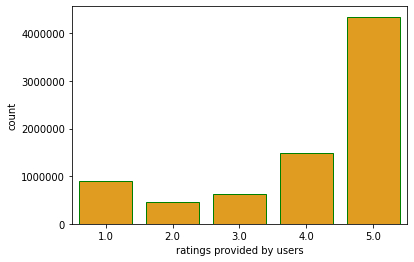

In [13]:
sns.countplot(df.ratings , color = 'orange', edgecolor = 'green',  alpha = 1.0);
plt.xlabel('ratings provided by users');

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   3.d. Observations
<a id='3d'></a>

#### *Comments:*


<font color = blue>
    
- Ratings column ranges between 1 to 5.
- Customers who rated 1 for product indicates the highest dissatisfaction and 5 indicates the highly satisfied customers towards electronics items.
- Out of all the ratings, highest number of customers rated 5 for the electronics products they purchased through Amazon. It is almost more than half of the entire number of customers or users.
- Comparatively, very less number of customers have given 2 stars or ratings to products they have purchased.
- So, the more than half of the users rated 5 for products they purchased followed by 4 stars, 1 star, 3 stars and 2 stars.
- Since, the dataset has huge number of records, handling issues will take place, so we've to make it less sparse or dense.


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 4. Making dataset less sparse/denser & Spliting data into Test and Train Set
<a id='STT'></a>

In [14]:
dff = df.drop(columns = ['timestamp'])

In [15]:
dff.head()

,userId,productId,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [16]:
dff.ratings.unique()

array([5., 1., 3., 2., 4.])

<font color = blue>
    
- Let’s check the users who have given highest number of ratings.

In [17]:
count = dff['userId'].value_counts()
count

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
AH6YUR9A96IES       1
A2SDKPQEBTWOZW      1
A1LPMD49GJYYPL      1
AML673H7ITRDM       1
A3HV7GYV4F1Z19      1
Name: userId, Length: 4201696, dtype: int64

<font color = blue>

- Take subset of dataset to make it less sparse/dense. (For example, keep the users only who has given 50 or more number of ratings)

In [18]:
ratings_50 = dff[dff['userId'].isin(count[count>=50].index)]

In [19]:
ratings_50.head()

,userId,productId,ratings
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0


In [20]:
dff.shape

(7824481, 3)

In [21]:
ratings_50.shape

(125871, 3)


<font color = blue>


- After considering the users who have rated more than 50 items, we ended up having 1,25,871 records, which makes our dataset less sparse and more dense and accurate with genuine users.

In [22]:
# Number of unique userid and productid in the new data after considering the users who has given 50 or more number of ratings

print('Number of USERS in raw data set =', df['userId'].nunique())

print('Number of USERS in modified data set =', ratings_50['userId'].nunique())

print('Number of PRODUCTS in raw data set =', df['productId'].nunique())

print('Number of PRODUCTS in modified data set =', ratings_50['productId'].nunique())


Number of USERS in raw data set = 4201696
Number of USERS in modified data set = 1540
Number of PRODUCTS in raw data set = 476001
Number of PRODUCTS in modified data set = 48190


In [23]:
ratings_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 93 to 7824443
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     125871 non-null  object 
 1   productId  125871 non-null  object 
 2   ratings    125871 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.8+ MB


In [24]:
def indetailtable(ratings_50):
    print(f'Dataset Shape: {ratings_50.shape}')
    print('Total Number of rows in dataset= {}'.format(ratings_50.shape[0]))
    print('Total Number of columns in dataset= {}'.format(ratings_50.shape[1]))
    print('Various datatypes present in the dataset are: {}\n'.format(ratings_50.dtypes.value_counts()))
    
    summary = pd.DataFrame(ratings_50.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary['Name'] = summary[['Name', 'dtypes']]
    summary['Misssing_values'] = ratings_50.isnull().sum().values
    summary['Unique_values'] = ratings_50.nunique().values
    summary['Duplicate_values'] = ratings_50.duplicated().sum()

   
    return summary

In [25]:
brief_50 = indetailtable(ratings_50)
brief_50

Dataset Shape: (125871, 3)
Total Number of rows in dataset= 125871
Total Number of columns in dataset= 3
Various datatypes present in the dataset are: object     2
float64    1
dtype: int64



,index,dtypes,Name,Misssing_values,Unique_values,Duplicate_values
0,userId,object,userId,0,1540,0
1,productId,object,productId,0,48190,0
2,ratings,float64,ratings,0,5,0


#### Let's start the the recommender project by looking at the Long Tail Plot.

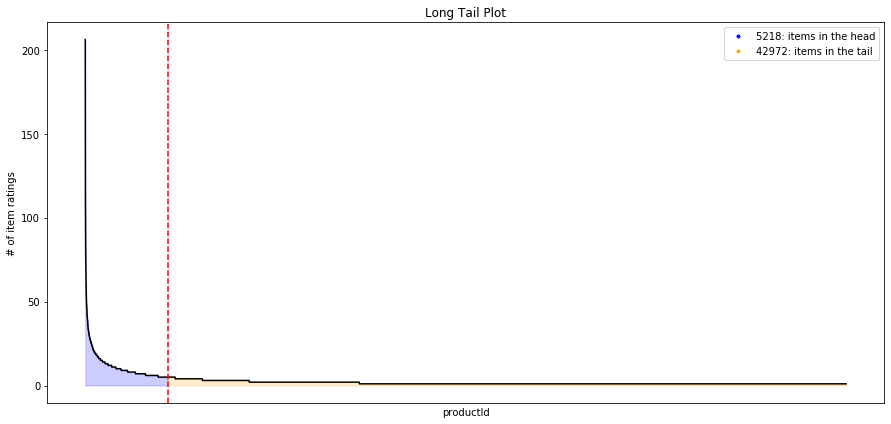

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))
recmetrics.long_tail_plot(df = ratings_50, 
             item_id_column="productId", 
             interaction_type="item ratings", 
             percentage=0.5,
             x_labels=False)

#### *Comments:*
<font color = blue>
    
- This plot helps us to explore the popularity patterns in user-product or item interaction. Here this interaction happens with respect to ratings.
    
- Typically, only a small percentage of items have a high volume of interactions, and this is referred to as the 'head'. And most items are in the 'long tail' region, however, they make up a small percentage of interactions.
    
- Here, we have taken the users who have rated at least 50 products to make the dataset less sparse and dense. 
    
- So, we have total 48,190 number of products in this sub data set. Out of which, 5,218 number of items are present in Head region, it means these products/items have a high volume of interactions. And 42,972 number of products are present in tail region with less amount of interaction.


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 5. Operation -1: Popularity Recommender Model
<a id='O1'></a>

#### *Comments:*
<font color = blue>
    
    
- Popularity based recommendation system works by recommending items viewed / purchased by most people and rated high.
- To recommend, it will rank list of items by their purchase count / viewed count.
- Here, we'll be taking mean of ratings at all the items and based upon that, we'll recommend the product.
- However, it's not a personalized recommendation engine.
- Two demerits of this model are, it doesn't take number of customers/ users into considerations and also it doesn't take time or release date of items.


#### - Let's check top 10 users who have rated for maximum number of items.

In [27]:
# Top 10 users based on rating
most_rated = dff.groupby('userId').size().sort_values(ascending = False)[:10]
most_rated

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

In [28]:
ratings_50.shape[0]

125871

In [29]:
ratings_50.shape[1]

3

### Calculate the density of the rating matrix

In [30]:
final_ratings_matrix = ratings_50.pivot(index = 'userId', columns = 'productId', values = 'ratings' )

final_ratings_matrix = final_ratings_matrix.fillna(final_ratings_matrix.mean(axis =0))
print('Shape of final_ratings_matrix:', final_ratings_matrix.shape)

given_number_of_ratings = np.count_nonzero(final_ratings_matrix)
print('Total given num of ratings = ', given_number_of_ratings)

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('Possible number of ratings = ', possible_num_of_ratings)

density = (given_number_of_ratings/possible_num_of_ratings)
density *= 100
print('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix: (1540, 48190)
Total given num of ratings =  74212600
Possible number of ratings =  74212600
density: 100.00%


In [31]:
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A100WO06OQR8BQ,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A105S56ODHGJEK,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A105TOJ6LTVMBG,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A10AFVU66A79Y1,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0


In [32]:
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
0594481813,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
0970407998,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,...,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000
0972683275,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,...,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000,4.750000
1400501466,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,...,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333,3.333333


In [33]:
#Split the data randomnly into test and train datasets
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(ratings_50, test_size = 0.3, random_state=10)
train_data.head()

,userId,productId,ratings
7760153,A2JKM8KF3296CW,B00HPM1G8Q,5.0
4898725,A2MSBIA18RXYQC,B005F5II1I,2.0
2725557,AGYH5U11ZKPFB,B002MZUNXU,5.0
3600595,A6FIAB28IS79,B003VAHYXW,4.0
3084187,A3IJ4Z18FTIIP,B00365EVXI,1.0


In [34]:
train_data.shape
test_data.shape

(88109, 3)

(37762, 3)

# Model Building Popularity Recommender model. (Non-Personalized)

In [35]:
# Count of userId for each unique product as recommendation score
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId':'score'}, inplace = True)
train_data_grouped.head()

,productId,score
0,0594451647,1
1,0970407998,2
2,0972683275,3
3,1400501466,4
4,1400501520,1


In [36]:
# Sort the products on recommendation score
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1])

# Generate a recommendation rank based upon score
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending = 0, method = 'first')

# Get the top 5 recommedations
popularity_recommendations = train_data_sort.head(5)
popularity_recommendations

,productId,score,Rank
30874,B0088CJT4U,142,1.0
19570,B003ES5ZUU,134,2.0
30273,B007WTAJTO,126,3.0
8700,B000N99BBC,117,4.0
30561,B00829TIEK,104,5.0


In [37]:
# Use popularity based recommender model to make predictions
def recommend(userId):
    user_recommendations = popularity_recommendations
    
    #add userid column for which the recommendations are being generated
    user_recommendations['userId'] = userId
    
    # Bring userId column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]
    
    return user_recommendations


In [38]:
find_recom = [30,160,40]         # This list is user choice.
for i in find_recom:
    print('Here is the recommendations for the userId: %d\n'%(i))
    print(recommend(i))
    print('\n')

Here is the recommendations for the userId: 30

       userId   productId  score  Rank
30874      30  B0088CJT4U    142   1.0
19570      30  B003ES5ZUU    134   2.0
30273      30  B007WTAJTO    126   3.0
8700       30  B000N99BBC    117   4.0
30561      30  B00829TIEK    104   5.0


Here is the recommendations for the userId: 160

       userId   productId  score  Rank
30874     160  B0088CJT4U    142   1.0
19570     160  B003ES5ZUU    134   2.0
30273     160  B007WTAJTO    126   3.0
8700      160  B000N99BBC    117   4.0
30561     160  B00829TIEK    104   5.0


Here is the recommendations for the userId: 40

       userId   productId  score  Rank
30874      40  B0088CJT4U    142   1.0
19570      40  B003ES5ZUU    134   2.0
30273      40  B007WTAJTO    126   3.0
8700       40  B000N99BBC    117   4.0
30561      40  B00829TIEK    104   5.0




<font color = blue>
    
- Here, score means the total count of users rated the product.

<font color = blue>

- Since this is a popularity-based recommender model, recommendations remain the same for all users

- We predict the products based on the popularity. It is not personalized to particular user

## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 6. Operation -2: Collaborative Filtering Model and it's evaluation
<a id='O2'></a>

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   6.a. Singular Value Decomposition (SVD)
<a id='O2a'></a>

#### Model-Based Collaborative filtering: Singular Value Decomposition

In [39]:
pivot_df = ratings_50.pivot(index = 'userId', columns = 'productId', values = 'ratings').fillna(final_ratings_matrix.mean(axis=0))
pivot_df.shape
pivot_df.head()

(1540, 48190)

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A100WO06OQR8BQ,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A105S56ODHGJEK,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A105TOJ6LTVMBG,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A10AFVU66A79Y1,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0


In [42]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.set_index(['user_index'], inplace = True)

# Actual ratings given by users
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
1,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
2,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
3,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
4,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0


<font color = blue>
    
Now, next step is to calculate the similarity between the users

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(pivot_df)


In [44]:
similarity_with_items = pd.DataFrame(cosine, index = pivot_df.index)

similarity_with_items.columns = pivot_df.index
similarity_with_items.sample(5)

user_index,0,1,2,3,4,5,6,7,8,9,...,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539
user_index,,,,,,,,,,,,,,,,,,,,,
436,0.999943,0.999844,0.999941,0.999933,0.999955,0.999952,0.999942,0.999963,0.999939,0.999960,...,0.999948,0.999924,0.999940,0.999963,0.999938,0.999946,0.999948,0.999915,0.999961,0.999961
146,0.999950,0.999859,0.999948,0.999939,0.999962,0.999958,0.999948,0.999970,0.999945,0.999968,...,0.999955,0.999934,0.999946,0.999970,0.999946,0.999953,0.999955,0.999922,0.999969,0.999968
989,0.999948,0.999853,0.999946,0.999934,0.999960,0.999956,0.999945,0.999968,0.999944,0.999966,...,0.999954,0.999932,0.999945,0.999969,0.999943,0.999950,0.999953,0.999918,0.999966,0.999966
171,0.999929,0.999832,0.999927,0.999918,0.999939,0.999936,0.999927,0.999949,0.999925,0.999946,...,0.999935,0.999911,0.999926,0.999949,0.999925,0.999932,0.999934,0.999901,0.999947,0.999947
670,0.999968,0.999873,0.999966,0.999958,0.999980,0.999976,0.999966,0.999988,0.999964,0.999986,...,0.999974,0.999952,0.999965,0.999989,0.999965,0.999972,0.999973,0.999940,0.999987,0.999986


<font color = blue>

- Dissimilarity among users can be observed

# SVD Method

<font color = blue>
    
    
- This is the best method to apply on a large sparse matrix
- Apart from matrix decomposition, it is useful in many ways, such as data compression, noise reduction similar to Principal Component Analysis and Latent Semantic Indexing (LSI), used in document retrieval and word similarity in Text mining.


In [45]:
from scipy.sparse.linalg import svds
# Singular value decomposition
U, sigma, Vt = svds (pivot_df, k= 10)
# constructing diagonal array in SVD
sigma = np.diag(sigma)

In [46]:
pd.DataFrame(sigma).head()

,0,1,2,3,4,5,6,7,8,9
0,15.155483,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,15.316889,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,15.842244,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,16.392685,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,16.719592,0.0,0.0,0.0,0.0,0.0



#### *Comments:*


<font color = blue>

- Above Matrix is the Diagonal Matrix, which contains the square root of Eigen vectors in descending order

- Lets get the predicted matrix by multiplying the left singular vector matrix / orthogonal matrix (U), Diagonal matrix (Sigma) and Right singular vector matrix (Vt).


In [47]:
predicted_ratings_all_users = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(predicted_ratings_all_users, columns = pivot_df.columns)
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,5.000206,3.000123,2.499814,4.750204,3.333421,5.000206,4.500283,3.000325,3.833856,2.500236,...,4.000165,5.000206,5.000206,4.000165,3.000123,4.000165,5.000206,5.000206,4.499991,5.000206
1,5.000698,3.000419,2.512097,4.744042,3.342292,5.000698,4.512528,3.003193,3.852004,2.506053,...,4.000559,5.000698,5.000698,4.000559,3.000419,4.000559,5.000698,5.000698,4.496086,5.000698
2,4.999847,2.999908,2.500837,4.750344,3.332642,4.999847,4.499897,2.998982,3.833574,2.499981,...,3.999878,4.999847,4.999847,3.999878,2.999908,3.999878,4.999847,4.999847,4.500337,4.999847
3,4.999429,2.999658,2.497307,4.749658,3.332764,4.999429,4.499708,2.999225,3.834418,2.499620,...,3.999543,4.999429,4.999429,3.999543,2.999658,3.999543,4.999429,4.999429,4.499791,4.999429
4,5.000100,3.000060,2.500537,4.750312,3.333167,5.000100,4.500057,2.999728,3.833806,2.500370,...,4.000080,5.000100,5.000100,4.000080,3.000060,4.000080,5.000100,5.000100,4.500143,5.000100


<font color = blue>

- Let's recommend the items based on the predicted ratings matrix

In [48]:
# Recommend the items with the highest predicted ratings

def recommend_items(userId, pivot_df, preds_df, num_recommendations):
    
    user_idx = userId - 1  # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending = False)
    # sorted user ratings
    
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending = False)
    # Sorted user predictions
    
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis =1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.sort_values('user_predictions', ascending = False)
    print('\nBelow are the recommended items for user (user_id = {}:\n)'.format(userId))
    print(temp.head(num_recommendations))

In [49]:
# Enter 'userId' and 'num_recommendations' for any user

userId = 36
num_recommendations = 5
recommend_items(userId, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user (user_id = 36:
)
                   user_ratings  user_predictions
Recommended Items                                
B00LKG1MC8                  5.0          4.999846
B000QJ56WW                  5.0          4.999846
B000QJ3IIG                  5.0          4.999846
B000QJ34JE                  5.0          4.999846
B000QIZXHG                  5.0          4.999846


<font color = blue>

- Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

- Evaluation of Model-based Collaborative Filtering (SVD)

In [50]:
# Actual ratings given by the users
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A100WO06OQR8BQ,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A105S56ODHGJEK,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A105TOJ6LTVMBG,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0
A10AFVU66A79Y1,5.0,3.0,2.5,4.75,3.333333,5.0,4.5,3.0,3.833333,2.5,...,4.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,4.5,5.0


In [51]:
# Average Actual rating for each item
final_ratings_matrix.mean().head()

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
dtype: float64

In [52]:
# predicted ratings
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,5.000206,3.000123,2.499814,4.750204,3.333421,5.000206,4.500283,3.000325,3.833856,2.500236,...,4.000165,5.000206,5.000206,4.000165,3.000123,4.000165,5.000206,5.000206,4.499991,5.000206
1,5.000698,3.000419,2.512097,4.744042,3.342292,5.000698,4.512528,3.003193,3.852004,2.506053,...,4.000559,5.000698,5.000698,4.000559,3.000419,4.000559,5.000698,5.000698,4.496086,5.000698
2,4.999847,2.999908,2.500837,4.750344,3.332642,4.999847,4.499897,2.998982,3.833574,2.499981,...,3.999878,4.999847,4.999847,3.999878,2.999908,3.999878,4.999847,4.999847,4.500337,4.999847
3,4.999429,2.999658,2.497307,4.749658,3.332764,4.999429,4.499708,2.999225,3.834418,2.499620,...,3.999543,4.999429,4.999429,3.999543,2.999658,3.999543,4.999429,4.999429,4.499791,4.999429
4,5.000100,3.000060,2.500537,4.750312,3.333167,5.000100,4.500057,2.999728,3.833806,2.500370,...,4.000080,5.000100,5.000100,4.000080,3.000060,4.000080,5.000100,5.000100,4.500143,5.000100


In [53]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()] , axis =1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['product_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,product_index
productId,,,
0594451647,5.000000,5.000000,0
0594481813,3.000000,3.000000,1
0970407998,2.500000,2.500000,2
0972683275,4.750000,4.750000,3
1400501466,3.333333,3.333333,4


In [54]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings)**2).mean()**0.5),5)
print('\n RMSE SVD Model = {}\n'.format(RMSE))


 RMSE SVD Model = 0.0



<font color = Brown>

### - Get top-K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, so we will recommend 5 new products

In [55]:
# Enter 'userId' and 'num_recommendations' for the user
userId = 125
num_recommendations = 10
recommend_items(userId, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user (user_id = 125:
)
                   user_ratings  user_predictions
Recommended Items                                
B00LKG1MC8                  5.0          5.000512
B000QJ6KXQ                  5.0          5.000512
B000QJ46SW                  5.0          5.000512
B000QJ3IIG                  5.0          5.000512
B000QJ34JE                  5.0          5.000512
B000QIZXHG                  5.0          5.000512
B000QGITWO                  5.0          5.000512
B000QFSO5M                  5.0          5.000512
B000QFKDJ2                  5.0          5.000512
B000QFDIIU                  5.0          5.000512


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   6.b. Item-Item Collaborative Model
<a id='O2b'></a>

- This model is covered under Surprised library section 

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   6.c. User-User Collaborative model
<a id='O2c'></a>

- This model is covered under Surprised library section

## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 7. Operation -3: Collaborative Filtering Model using Surprise Library and it's evaluation
<a id='O3'></a>

#### Transform data to Surprise format

In [56]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import SVD, KNNWithMeans
from surprise import accuracy


reader = Reader(rating_scale = (1,5))

In [57]:
ratings_50.head(2)

,userId,productId,ratings
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0


In [58]:
ratings_50.shape

(125871, 3)

In [59]:
data = Dataset.load_from_df(ratings_50[['userId', 'productId', 'ratings' ]],reader)

In [60]:
data.df.head(2)

,userId,productId,ratings
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0


##### *Comments:*


<font color = blue>


- Here we will be dealing with surprise library to build SVD based, Item-Item & User-User Collaborative filtering recommendation models. 
- Here we are taking ratings from 1 to 5 through reader variable.

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   7.a. Singular Value Decomposition (SVD)
<a id='O3a'></a>

In [61]:
from surprise import Dataset, Reader

reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(ratings_50[['userId', 'productId', 'ratings' ]],reader)

In [62]:
# split data set to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size = 0.30, random_state = 302578)

In [63]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x00000000937F1F48>

In [64]:
# However the ids are the inner ids and not the row ids
# raw ids can be obtained as follows

print(trainset.to_raw_uid(0))

A18L9A64XNGVGU


In [65]:
svd_model= SVD(n_factors =5, biased=False)
svd_model.fit(trainset)

In [66]:
test_pred = svd_model.test(testset)

In [67]:
test_pred_pd = pd.DataFrame(test_pred)
test_pred_pd.head(6)

,uid,iid,r_ui,est,details
0,ACP9S40H3SHY1,B004J1G2MQ,5.0,1.780432,{'was_impossible': False}
1,A11YIHB6IW352W,B00008Y1BX,5.0,1.804389,{'was_impossible': False}
2,A36K2N527TXXJN,B00HR3J65I,4.0,5.000000,{'was_impossible': False}
3,A3Q4TYJVAM4IRM,B000NBBWNU,5.0,4.261619,"{'was_impossible': True, 'reason': 'User and i..."
4,A3BACUOZV1M0WM,B000066CCU,4.0,2.632804,{'was_impossible': False}
5,A3MMR2WDKAK0PA,B000HKIPVE,3.0,1.206295,{'was_impossible': False}


In [68]:
test_pred_pd.columns = ['userId', 'productId', 'actual', 'cf_predicted', 'details']

In [69]:
test_pred_pd.head()

,userId,productId,actual,cf_predicted,details
0,ACP9S40H3SHY1,B004J1G2MQ,5.0,1.780432,{'was_impossible': False}
1,A11YIHB6IW352W,B00008Y1BX,5.0,1.804389,{'was_impossible': False}
2,A36K2N527TXXJN,B00HR3J65I,4.0,5.000000,{'was_impossible': False}
3,A3Q4TYJVAM4IRM,B000NBBWNU,5.0,4.261619,"{'was_impossible': True, 'reason': 'User and i..."
4,A3BACUOZV1M0WM,B000066CCU,4.0,2.632804,{'was_impossible': False}


In [70]:
# evaluate model with MSE and RMSE
print(recmetrics.mse(test_pred_pd.actual, test_pred_pd.cf_predicted))
print(recmetrics.rmse(test_pred_pd.actual, test_pred_pd.cf_predicted))

2.89102515139455
1.7003014883821488


In [71]:
# compute RMSE
accuracy.rmse((test_pred))

RMSE: 1.7003


1.7003014883821488

In [72]:
# Create model (matrix of predicted values)
cf_model = test_pred_pd.pivot_table(index = 'userId', columns = 'productId', values = 'cf_predicted').fillna(0)

In [73]:
def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ['predicted_rating']
    recommended_items = recommended_items.sort_values('predicted_rating', ascending = False)
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [74]:
# get example prediction
get_users_predictions('A11YIHB6IW352W', 10, cf_model)

['B001MSU1HG',
 'B002JQNXZC',
 'B007ARLMI0',
 'B000YQT78G',
 'B008XG1N72',
 'B003CH5346',
 'B000R4OUNC',
 'B008R6OPJQ',
 'B005KG44V0',
 'B004O0PAKW']

#### *Comments:*


<font color = blue>

- These are the products recommended for the user 'A11YIHB6IW352W' in descending order. It means, the 1st product has received the highest rating followed by the other products listed in the above example.
- Lets now make this recommendation for the users and products present in the test data.


In [75]:
# format test data
test = test_pred_pd.copy().groupby('userId')['productId'].agg(actual =  (lambda x: list(set(x))))

# make recommendations for all members in the test data
cf_recs = [] = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 10, cf_model)
    cf_recs.append(cf_predictions)
    
test['cf_predictions'] = cf_recs
test.head()

,actual,cf_predictions
userId,,
A100UD67AHFODS,"[B000ERAOL4, B00176NOCM, B001JIBOLQ, B000233WJ...","[B000Q8UAWY, B009B0MY6S, B0002KVQBA, B0097BEFY..."
A100WO06OQR8BQ,"[B0002L5R78, B002R5AM7C, B00AJHDZSI, B004CLYEH...","[B004CLYEH8, B0002CPBWI, B008DWCRQW, B001BRP1K..."
A105S56ODHGJEK,"[B00G6CLNCK, B00829TIEK, B00829TIA4, B001O5CCQ...","[B001NTFATI, B001O5CCQK, B00IVFDZBC, B00829TIA..."
A105TOJ6LTVMBG,"[B00182CIB8, B002Y32Z5O, B001AZV2WY, B000SEN9U...","[B00182CIB8, B000C77B4O, B004FV67YS, B002Y32Z5..."
A10AFVU66A79Y1,"[B007B64ND6, B005H7MXZ6, B003SX0NF8, B00DY2Y28...","[B00DY2Y28M, B004AS3ZQO, B00452V1ZW, B002FL507..."



<font color = blue>


- Actual column shows the products preferred by the corresponding users, and cf_predictions column shows the recommended products by the model for same users.


## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   7.b. Item-Item Collaborative Model
<a id='O3b'></a>

### KNNWithMeans

In [76]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_i = KNNWithMeans(k=12, sim_options={ 'user_based': False})
 

algo_i.fit(trainset)

Computing the msd similarity matrix...


MemoryError: Unable to allocate 10.9 GiB for an array with shape (38257, 38257) and data type float64

### NB:

<font color = blue>


- Due to the insufficient memory, machine can't allocate memory for calculation, so we can make it less sparse or dense by taking the users who have rated more than 150 products.

In [160]:
ratings_150 = dff[dff['userId'].isin(count[count>=157].index)]

In [161]:
ratings_150.shape

(20888, 3)

In [162]:
pd.DataFrame(ratings_150.nunique().values)

,0
0,92
1,12942
2,5



<font color = blue>

- So, we have total 92 users and 12942 products after taking the users who have rated more than 150 items.

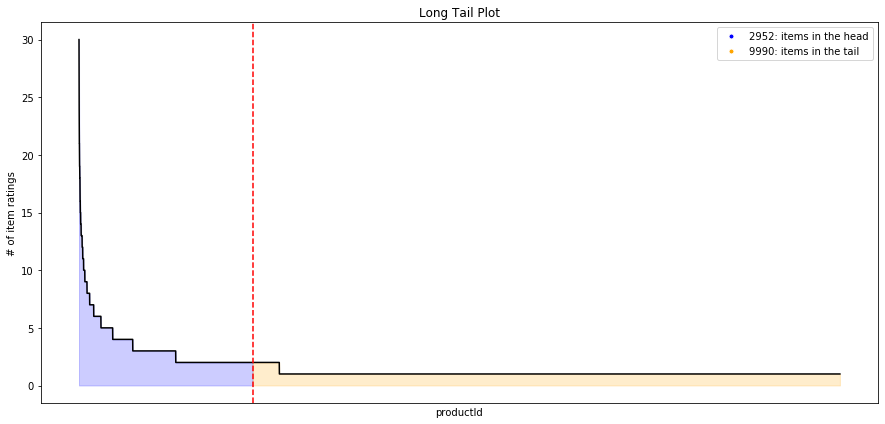

In [163]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))
recmetrics.long_tail_plot(df = ratings_150, 
             item_id_column="productId", 
             interaction_type="item ratings", 
             percentage=0.5,
             x_labels=False)

In [164]:
reader = Reader(rating_scale = (1,5))
data_150 = Dataset.load_from_df(ratings_150[['userId', 'productId', 'ratings' ]],reader)

In [165]:
trainset_150, testset_150= train_test_split(data_150, test_size = 0.30, random_state = 302578)

In [166]:
trainset_150.all_ratings()

<generator object Trainset.all_ratings at 0x00000000127D6F48>

In [167]:
print(trainset_150.to_raw_uid(0))

A250AXLRBVYKB4



<font color = blue>

    
- Let's import the item based collaborative filtering model through KNN with the help of 50 neighbours. In this collaborative filtering model mean ratings of each user is considered.

In [168]:
algo_i = KNNWithMeans(k=50, sim_options={  'user_based': False})
 

algo_i.fit(trainset_150)

Computing the msd similarity matrix...
Done computing similarity matrix.


<font color = blue>

- After training the model through trainset, now we will test it and predict the estimated ratings for each user.

In [169]:
test_i = algo_i.test(testset_150)
test_i = pd.DataFrame(test_i)
test_i.head()

,uid,iid,r_ui,est,details
0,A1BT6TL7UCIC5Y,B00452V1TS,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."
1,A1ODOGXEYECQQ8,B0050MM40C,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."
2,A3OXHLG6DIBRW8,B00CSDMWGW,5.0,5.000000,"{'actual_k': 26, 'was_impossible': False}"
3,A2AY4YUOX2N1BQ,B0044XTJ10,5.0,5.000000,"{'actual_k': 1, 'was_impossible': False}"
4,A1ODOGXEYECQQ8,B000B69WVG,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."


<font color = blue>
    
- To make it more simplier, we will rename the columns.

In [170]:
test_i.columns = ['userId', 'productId', 'actual', 'cf_predicted', 'details']
test_i.head()

,userId,productId,actual,cf_predicted,details
0,A1BT6TL7UCIC5Y,B00452V1TS,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."
1,A1ODOGXEYECQQ8,B0050MM40C,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."
2,A3OXHLG6DIBRW8,B00CSDMWGW,5.0,5.000000,"{'actual_k': 26, 'was_impossible': False}"
3,A2AY4YUOX2N1BQ,B0044XTJ10,5.0,5.000000,"{'actual_k': 1, 'was_impossible': False}"
4,A1ODOGXEYECQQ8,B000B69WVG,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."


In [171]:
#evaluate model with MSE and RMSE
print(recmetrics.mse(test_i.actual, test_i.cf_predicted))
print(recmetrics.rmse(test_i.actual, test_i.cf_predicted))

0.9818158249972551
0.990866199341392


<font color = blue>
    
- The RMSE value has come around 1.0...

## <span style="font-family: Cambria; font-weight:bold;font-size:1 em;color:green;">   7.c. User-User Collaborative model
<a id='O3c'></a>

<font color = blue>
    
- Let's import the user based collaborative filtering model through KNN with the help of 50 neighbours. In this collaborative filtering model mean ratings of each user is considered.

In [172]:
algo_u = KNNWithMeans(k=50, sim_options={ 'user_based': True})
 

algo_u.fit(trainset_150)

Computing the msd similarity matrix...
Done computing similarity matrix.


<font color = blue>

- After training the model through trainset, let's now test it and get the recommendation for the users.

In [173]:
test_u = algo_u.test(testset_150)
test_u = pd.DataFrame(test_u)
test_u.head()

,uid,iid,r_ui,est,details
0,A1BT6TL7UCIC5Y,B00452V1TS,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."
1,A1ODOGXEYECQQ8,B0050MM40C,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."
2,A3OXHLG6DIBRW8,B00CSDMWGW,5.0,4.912116,"{'actual_k': 4, 'was_impossible': False}"
3,A2AY4YUOX2N1BQ,B0044XTJ10,5.0,5.000000,"{'actual_k': 1, 'was_impossible': False}"
4,A1ODOGXEYECQQ8,B000B69WVG,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."


- For convienience, let's rename the columns

In [174]:
test_u.columns = ['userId', 'productId', 'actual', 'cf_predicted', 'details']
test_u.head()

,userId,productId,actual,cf_predicted,details
0,A1BT6TL7UCIC5Y,B00452V1TS,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."
1,A1ODOGXEYECQQ8,B0050MM40C,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."
2,A3OXHLG6DIBRW8,B00CSDMWGW,5.0,4.912116,"{'actual_k': 4, 'was_impossible': False}"
3,A2AY4YUOX2N1BQ,B0044XTJ10,5.0,5.000000,"{'actual_k': 1, 'was_impossible': False}"
4,A1ODOGXEYECQQ8,B000B69WVG,5.0,4.306887,"{'was_impossible': True, 'reason': 'User and/o..."


In [175]:
#evaluate model with MSE and RMSE
print(recmetrics.mse(test_u.actual, test_u.cf_predicted))
print(recmetrics.rmse(test_u.actual, test_u.cf_predicted))

0.9535198241289136
0.9764833967502538



<font color = blue>

- Here, the RMSE value is 0.98, which is less than the item-item collaborative filtering model.

## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 8. Get top - K ( K = 5) recommendations to the user
<a id='8K'></a>

<font color = blue>

- Let's get a prediction for specific users and items by using different models.

In [176]:
uid = str('A3BACUOZV1M0WM')  # raw user id (as in the ratings file). They are **strings**!
iid = "B000066CCU"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = svd_model.predict(uid, iid, r_ui=0.0, verbose=True)

user: A3BACUOZV1M0WM item: B000066CCU r_ui = 0.00   est = 2.63   {'was_impossible': False}


##### *Comments:*
<font color = blue>


- The above code is used to predict the rating for a product for a single user with the help of SVD model.

- Here the predicted rating has come out to be 2.52 and here I'm able to identify neighbours for that individual user. And this rating has come up based on the neighbours of that particular user.


In [177]:
uid = str('AIJQU979J6UFY')  # raw user id (as in the ratings file). They are **strings**!
iid = "B0044DEDC0"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo_i.predict(uid, iid, r_ui=0.0, verbose=True)

user: AIJQU979J6UFY item: B0044DEDC0 r_ui = 0.00   est = 4.24   {'actual_k': 50, 'was_impossible': False}


<font color = blue>
    
- In the above code, we tried to predict the rating of a particular product by a user with the help of item based collaborative filtering. Here we will be seeing the products that are similar based on the ratings that they have received.

- Here the predicted rating has come out to be 4.24, with a neighbour value of 50, it means, the item has 12 number of neighbours with similar kind of ratings for the same user.


In [178]:
uid = str('AIJQU979J6UFY')  # raw user id (as in the ratings file). They are **strings**!
iid = "B000066CCU"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo_i.predict(uid, iid, r_ui=0.0, verbose=True)

user: AIJQU979J6UFY item: B000066CCU r_ui = 0.00   est = 4.31   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


<font color = blue>

- Now, here for the same user, we have given another item, and the rating we received is 4.32, however, this product has no neighbours. It means the item is purely new and unique in nature.

- Thus, this is a solid example of Grey Sheep Problem, where the item/user has no neighbour and they are alone in their class.


In [179]:
uid = str('AIJQU979J6UFY')  # raw user id (as in the ratings file). They are **strings**!
iid = "B0044DEDC0"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo_u.predict(uid, iid, r_ui=0.0, verbose=True)

user: AIJQU979J6UFY item: B0044DEDC0 r_ui = 0.00   est = 4.20   {'actual_k': 3, 'was_impossible': False}


<font color = blue>
    
- In the above code, we tried to predict the rating of a particular product by a user with the help of user based collaborative filtering. Here we will be seeing the users who are similar based on their test of products and ratings that they have given to products or having similar purchasing behaviour.

- Here the predicted rating has come out to be 4.20, with a neighbour value of 3, it means, the user has 3 number of neighbours with similar kind of taste / choice and ratings for the same items.


In [180]:
uid = str('AIJQU979J6UFY')  # raw user id (as in the ratings file). They are **strings**!
iid = "B000066CCU"  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo_u.predict(uid, iid, r_ui=0.0, verbose=True)

user: AIJQU979J6UFY item: B000066CCU r_ui = 0.00   est = 4.31   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


<font color = blue>

- Now, here for the same user, we have given another item, and the rating we received is 4.32, however, this product has no neighbours. It means the user/item is purely new and unique in nature and we do not have prior knowledge about them.

- Once again this is a solid example of Grey Sheep Problem, where the item/user has no neighbour and they are alone in their class.


### Now Let's get top 5 recommendation to the user

In [181]:
pred = pd.DataFrame(test_pred)

In [182]:
pred.columns = ['user', 'productId', 'actual_rating', 'predicted_ratings', 'details']
pred.head(5)

,user,productId,actual_rating,predicted_ratings,details
0,ACP9S40H3SHY1,B004J1G2MQ,5.0,1.780432,{'was_impossible': False}
1,A11YIHB6IW352W,B00008Y1BX,5.0,1.804389,{'was_impossible': False}
2,A36K2N527TXXJN,B00HR3J65I,4.0,5.000000,{'was_impossible': False}
3,A3Q4TYJVAM4IRM,B000NBBWNU,5.0,4.261619,"{'was_impossible': True, 'reason': 'User and i..."
4,A3BACUOZV1M0WM,B000066CCU,4.0,2.632804,{'was_impossible': False}


### - let's recommend top 5 items to the customer / user 'A3BACUOZV1M0WM'

In [183]:
pred[pred['user'] == 'A3BACUOZV1M0WM'][['productId', 'actual_rating','predicted_ratings']].sort_values(by = 'actual_rating',ascending = False).head(5)

,productId,actual_rating,predicted_ratings
16890,B005Y1UFIM,5.0,4.212708
19053,B00009R6WO,5.0,5.000000
5534,B001F8SCRE,5.0,5.000000
5799,B0018SHJPM,5.0,4.261619
8121,B004RORMF6,5.0,5.000000


In [184]:
# Enter 'userId' and 'num_recommendations' for the user

userId = 35
num_recommendations = 5
recommend_items(userId, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user (user_id = 35:
)
                   user_ratings  user_predictions
Recommended Items                                
B00LKG1MC8                  5.0          5.000068
B000QS3CM4                  5.0          5.000068
B000QJ56WW                  5.0          5.000068
B000QJ46SW                  5.0          5.000068
B000QJ3IIG                  5.0          5.000068


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Purple;"> 9. Summary
<a id='C'></a>

<Span style="font-family: Times New Roman;font-size:1.2em;color:purple;">
    
> - In some of the collaborative filtering recommendation system, we have encountered Grey Sheep Problem. It means only one user has used the item and rated it, and the same items has not received any other ratings from other users. I.e. the item/user are alone and has no neighbours.

> - In this type of case, we will not be able to recognise the test of user, so it's hard to recommend any items based upon his/her choice. Therefore, the best option is to adopt Popularity Based Recommendation System and recommend the items which are widely popular. Or else, we can recommend the items based upon the description of the items rated by user, which is Content Based Recommendation System.

- But, this is not a pure form of Collaborative Recommendation System


<Span style="font-family: Times New Roman;font-size:1.2em;color:darkgreen;">
    
- Popularity based recommender system is not a personalized recommender system, therefor recommendation for each user remains the same.
- And this recommendation engine gives the products based upon the highest ratings provided by other users. Hence, we can infer that, the recommendations are biased towards the highest ratings. It doesn't take count of users into consideration, it also doesn't take time of ratings by users.

- We can add factors to this popularised Recommendation system to make it Hybrid Recommendation Engine.



<Span style="font-family: Times New Roman;font-size:1.2em;color:purple;">

> Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behaviour of 
The user and it is not dependent on any additional information.

> The Popularity-based recommender system is non-personalised and the recommendations are based on frequency counts, which may be not suitable to the user. You can see the difference above for the user id 30, 160 and 40, The Popularity based model has recommended the same set of 5 products to all. But Collaborative Filtering based model has recommended entire different list based on the user past purchase history


## <span style="font-family: Times New Roman; font-weight:bold;font-size:1.3em;color:Teal;"> 10. Optional
<a id='Op'></a>

### Summary:

<Span style="font-family: Times New Roman;font-size:1.2em;color:purple;">

- The receiver Operating Characteristics (ROC) plot is used to visualize the trade-off between benefits (true positives) and costs (False positives) for binary classification. The Area Under the Curve (AUC) is sometimes used as an evaluation metrics.

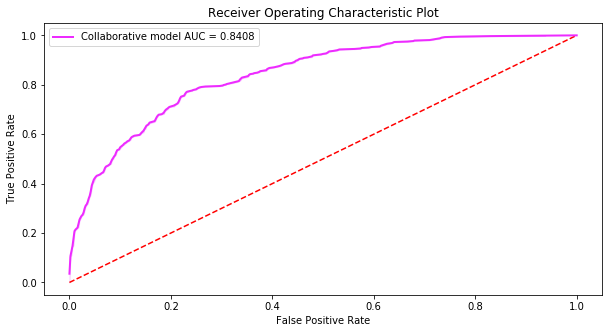

In [185]:
model_probs = np.concatenate([np.random.normal(loc=.2, scale=0.5, size=500), np.random.normal(loc=.9, scale=0.5, size=500)])
actual = [0] * 500
class_zero_actual = [1] * 500
actual.extend(class_zero_actual)

recmetrics.roc_plot(actual, model_probs, model_names="Collaborative model",  figsize=(10, 5))

### Summary:

<Span style="font-family: Times New Roman;font-size:1.2em;color:purple;">

- In this ROC-AUC curve, 0.5 has taken as cut-off value which is default and can't be changed. 
- Since, the curve is closer to top left corner, we can enjoy higher power with this model. 
- The model has an AUC value of 0.8408. Which is within the limit.

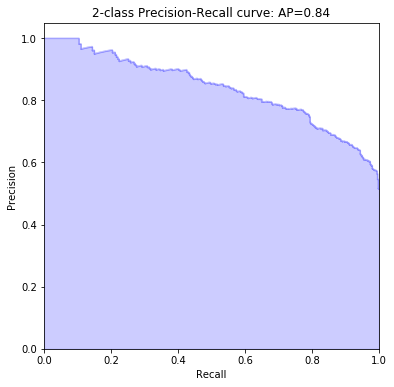

In [186]:
recmetrics.precision_recall_plot(targs=actual, preds=model_probs)

### Summary:

<Span style="font-family: Times New Roman;font-size:1.2em;color:purple;">

- The precision and Recall plot is used to visualize the trade-off between precision and recall for one class in a classification.

### Summary:

<Span style="font-family: Times New Roman;font-size:1.2em;color:purple;">

- Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

- Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

- The area under the curve in Precision - Recall plot is almost equal to the AUC, this signifies our model is good enough to recommend the items/products based on the users choice.

## <span style="font-family: Algerian; font-weight:bold;font-size:1.5em;color:Red; center">      The End